# Task2 : Movie Rating Prediction

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df = pd.read_csv("IMDb Movies India.csv",encoding = 'latin-1')

In [65]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [66]:
df = df.drop(df.index[0]).reset_index(drop=True)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [67]:
df.drop_duplicates(inplace=True)
df.shape

(15502, 10)

In [68]:
df = df.dropna() 

In [69]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [70]:
special_characters = ['(',')']

for char in special_characters:
    df['Year'] = df['Year'].str.replace(char, '')

C:\Users\DELL\AppData\Local\Temp\ipykernel_3484\2707003799.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year'] = df['Year'].str.replace(char, '')


In [71]:
df['Year'] = df['Year'].astype(int)

In [72]:
df['Year']

0        2019
2        2019
4        1997
5        2005
7        2012
         ... 
15492    2015
15493    2001
15502    1989
15504    1999
15507    1998
Name: Year, Length: 5659, dtype: int32

In [73]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [74]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [75]:
special_characters = ['@', '#', ',', '.','?',':']

for char in special_characters:
    df['Name'] = df['Name'].str.replace(char, '')

C:\Users\DELL\AppData\Local\Temp\ipykernel_3484\2196943543.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Name'] = df['Name'].str.replace(char, '')


In [76]:
genres=df['Genre'].str.split(',',expand=True)
genres.head(5)

,0,1,2
0,Drama,None,None
2,Comedy,Romance,None
4,Comedy,Drama,Musical
5,Drama,Romance,War
7,Horror,Mystery,Thriller


In [77]:
df.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
8,Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
9,116 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
10,1137 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
11,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
12,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [78]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

sorted_genre_counts = {genre: count for genre, count in sorted(genre_counts.items())}

for genre, count in sorted_genre_counts.items():
    print(f"{genre}: {count}")


 Action: 34
 Adventure: 172
 Biography: 31
 Comedy: 355
 Crime: 604
 Drama: 1954
 Family: 364
 Fantasy: 115
 History: 91
 Horror: 74
 Music: 50
 Musical: 322
 Mystery: 245
 News: 1
 Romance: 1221
 Sci-Fi: 28
 Sport: 38
 Thriller: 590
 War: 30
 Western: 1
Action: 1652
Adventure: 105
Animation: 40
Biography: 84
Comedy: 989
Crime: 271
Documentary: 48
Drama: 1842
Family: 52
Fantasy: 31
History: 8
Horror: 128
Music: 3
Musical: 90
Mystery: 59
Romance: 159
Sci-Fi: 4
Sport: 2
Thriller: 89
War: 3


In [79]:
df.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


In [80]:
df.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15492,False,False,False,False,False,False,False,False,False,False
15493,False,False,False,False,False,False,False,False,False,False
15502,False,False,False,False,False,False,False,False,False,False
15504,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

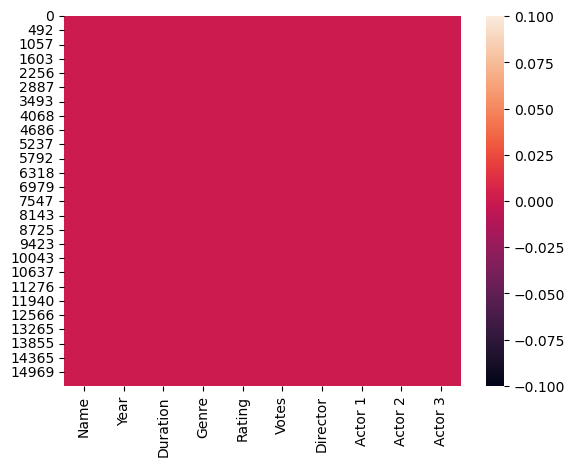

In [81]:
sns.heatmap(df.isnull())

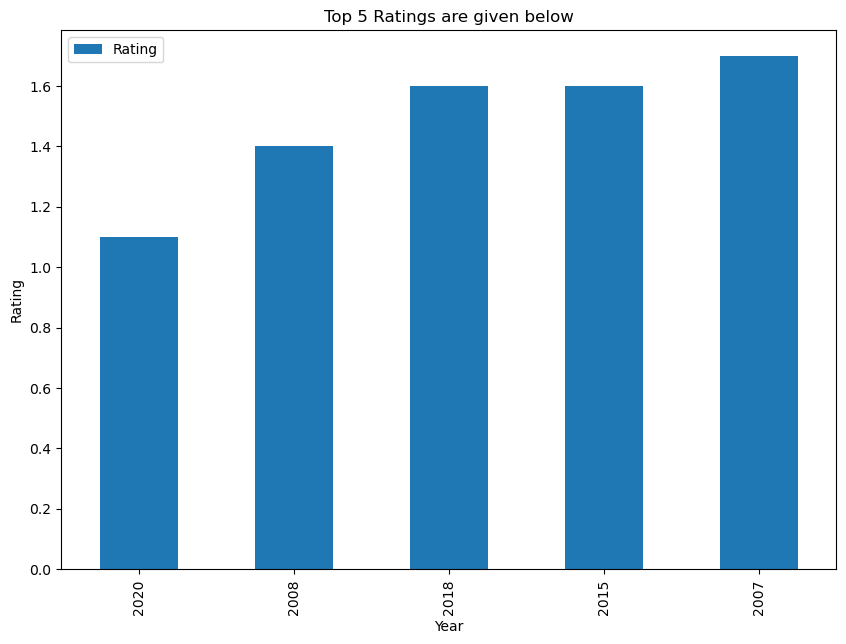

In [82]:
top5_rated = df[['Year', 'Rating']].sort_values(by = 'Rating',
                                                    ascending = True).head()
bars = top5_rated.plot(kind = 'bar',
                        x = 'Year',
                        y = 'Rating',
                        figsize = (10,7))
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Top 5 Ratings are given below')
plt.show()

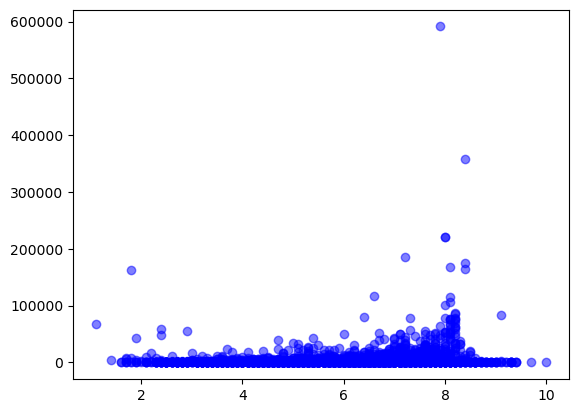

<Figure size 1000x600 with 0 Axes>

In [83]:
plt.scatter(df['Rating'], df['Votes'], color='blue',alpha=0.5, marker='o', label='Scatter Plot')
plt.figure(figsize = (10,6))
plt.show()

<AxesSubplot:ylabel='Rating'>

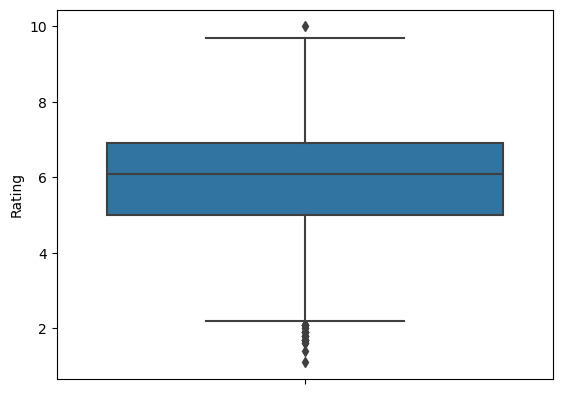

In [84]:
sns.boxplot(data=df,y='Rating')

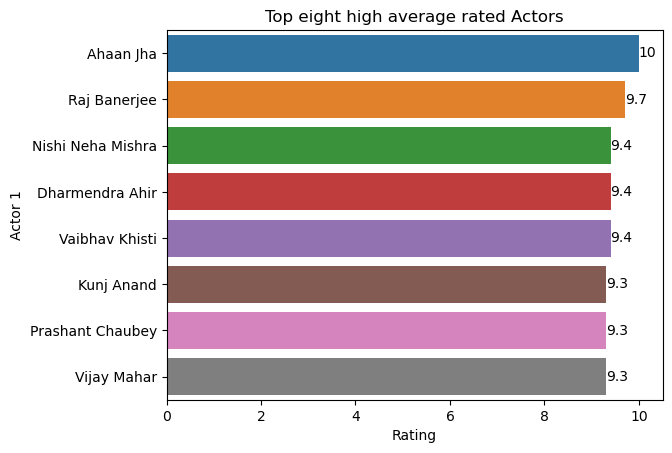

In [85]:
actor1_rate = df.groupby('Actor 1').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(8)

ax = sns.barplot(data=actor1_rate, x='Rating', y='Actor 1')
ax.bar_label(ax.containers[0])
plt.title('Top eight high average rated Actors')
plt.show()

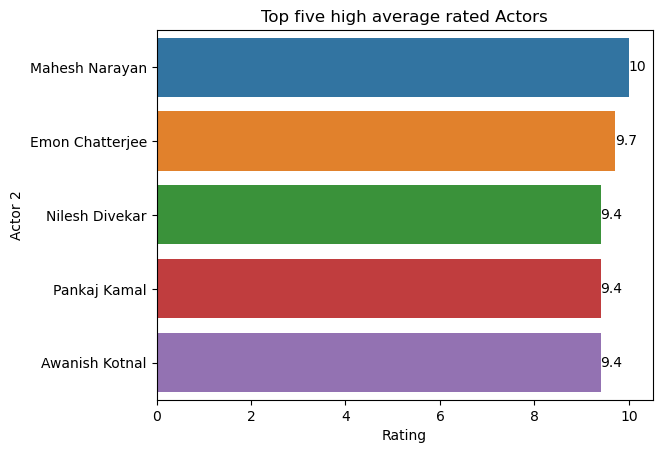

In [86]:
actor2_rate = df.groupby('Actor 2').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(5)

ax = sns.barplot(data=actor2_rate, x='Rating', y='Actor 2')
ax.bar_label(ax.containers[0])
plt.title('Top five high average rated Actors')
plt.show()

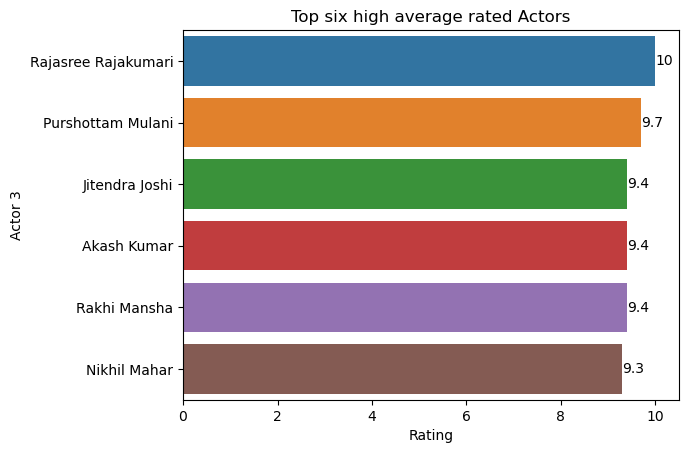

In [87]:
actor3_rate = df.groupby('Actor 3').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(6)

ax = sns.barplot(data=actor3_rate, x='Rating', y='Actor 3')
ax.bar_label(ax.containers[0])
plt.title('Top six high average rated Actors')
plt.show()

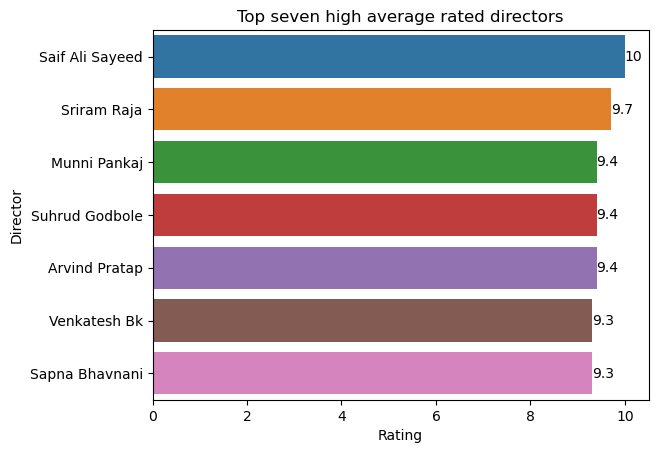

In [88]:
director_rate = df.groupby('Director').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                      .reset_index().head(7)
ax = sns.barplot(data=director_rate, x='Rating', y='Director')
ax.bar_label(ax.containers[0])
plt.title('Top seven high average rated directors')
plt.show()

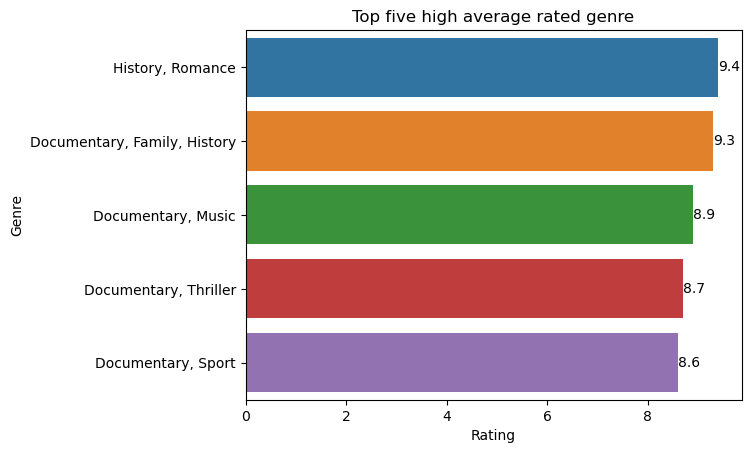

In [89]:
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(5)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre')
ax.bar_label(ax.containers[0])
plt.title('Top five high average rated genre')
plt.show()

In [90]:
df= df.drop(['Name'], axis=1)

In [91]:
actor1_encoding_map = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [92]:
df['actor1'] = round(df['Actor 1'].map(actor1_encoding_map['Rating']),1)
df['actor2'] = round(df['Actor 2'].map(actor2_encoding_map['Rating']),1)
df['actor3'] = round(df['Actor 3'].map(actor3_encoding_map['Rating']),1)
df['director'] = round(df['Director'].map(director_encoding_map['Rating']),1)
df['genre'] = round(df['Genre'].map(genre_encoding_map['Rating']),1)

In [93]:
df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,actor1,actor2,actor3,director,genre
0,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.8,7.0,7.0,7.0,6.4
2,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.4,4.4,4.4,4.4,5.7
4,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.8,5.8,5.9,5.3,6.2
5,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.4,6.9,6.5,7.4,6.8
7,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6,5.9,5.6,5.6,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15492,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.7,6.1,5.8,6.1,6.4
15493,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,4.2,5.8,6.0,7.2,7.0
15502,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,6.3,5.8,6.0,6.3,5.7
15504,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.5,4.6,5.7,5.2,5.5


In [94]:
df.drop(['Actor 1','Actor 2','Actor 3','Director','Genre'],axis=1, inplace=True)

In [41]:
df.corr()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
Year,1.000000,-0.327567,-0.204642,0.129749,-0.209719,-0.227672,-0.206574,-0.193998,-0.106299
Duration,-0.327567,1.000000,0.001839,0.097621,-0.039193,-0.049581,-0.045045,-0.024707,-0.054897
Rating,-0.204642,0.001839,1.000000,0.142563,0.750750,0.767801,0.776066,0.809482,0.429604
Votes,0.129749,0.097621,0.142563,1.000000,0.075514,0.046360,0.082693,0.114920,0.037977
actor1_encoded,-0.209719,-0.039193,0.750750,0.075514,1.000000,0.712704,0.688491,0.715179,0.375575
actor2_encoded,-0.227672,-0.049581,0.767801,0.046360,0.712704,1.000000,0.704286,0.714340,0.390088
actor3_encoded,-0.206574,-0.045045,0.776066,0.082693,0.688491,0.704286,1.000000,0.708390,0.373209
director_encoded,-0.193998,-0.024707,0.809482,0.114920,0.715179,0.714340,0.708390,1.000000,0.410402
genre_encoded,-0.106299,-0.054897,0.429604,0.037977,0.375575,0.390088,0.373209,0.410402,1.000000


<AxesSubplot:>

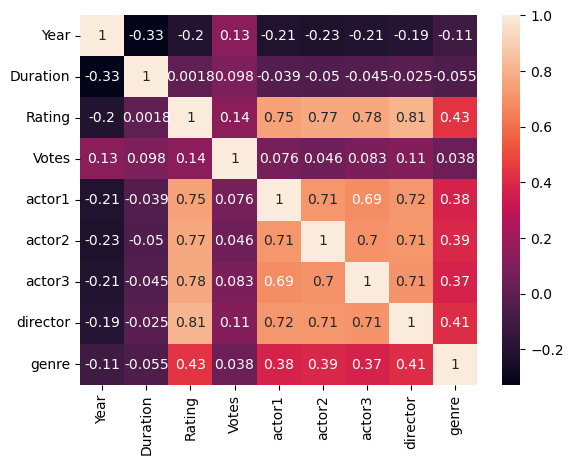

In [95]:
sns.heatmap(df.corr(),annot=True)

In [96]:
X = df.drop('Rating', axis=1)
y= df['Rating']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [100]:
model = LinearRegression()

In [101]:
model.fit(X_train, y_train)

LinearRegression()

In [102]:
predictions=model.predict(X_test)

In [53]:
print('R^2: ', r2_score(y_test, predictions))
print('MAE: ',mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

R^2:  0.7710727279750976
MAE:  0.4826774612067784
MSE:  0.4239146213982571
RMSE:  0.6510872609706452
